In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint
import numpy as np
import allensdk.brain_observatory.stimulus_info as stim_info
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
boc = BrainObservatoryCache(manifest_file='/home/mila/x/xuejing.pan/scratch/manifest.json')

## Getting all Allen BO metadata

In [3]:
all_dg_exps = boc.get_ophys_experiments(stimuli=[stim_info.DRIFTING_GRATINGS])

In [4]:
print("All experiments: %d\n" % len(all_dg_exps))

All experiments: 456



In [5]:
exp = all_dg_exps[16]
exp_id = all_dg_exps[16]['id']
exp_depth = all_dg_exps[16]["donor_name"]
#exps = boc.get_ophys_experiments(experiment_container_ids=[exp_id])
exp = boc.get_ophys_experiment_data(exp['id'])

In [6]:
exp_depth

'228379'

In [7]:
traces = exp.get_dff_traces()

In [8]:
num_rois = traces[1].shape[0]

In [9]:
stim_table = exp.get_stimulus_table("drifting_gratings")

In [10]:
print(stim_table)

     temporal_frequency  orientation  blank_sweep   start     end
0                   NaN          NaN          1.0     737     796
1                   8.0         45.0          0.0     827     887
2                   4.0        270.0          0.0     918     978
3                   NaN          NaN          1.0    1008    1068
4                   8.0         45.0          0.0    1099    1159
..                  ...          ...          ...     ...     ...
623                 4.0         90.0          0.0  115093  115153
624                 4.0        135.0          0.0  115183  115243
625                 2.0        135.0          0.0  115274  115334
626                 8.0        135.0          0.0  115364  115424
627                 8.0        315.0          0.0  115455  115515

[628 rows x 5 columns]


In [11]:
num_seqs = stim_table.index[-1]+1


In [12]:
master_stim_table = exp.get_stimulus_epoch_table()

EpochSeparationException: more than 2 epochs cut

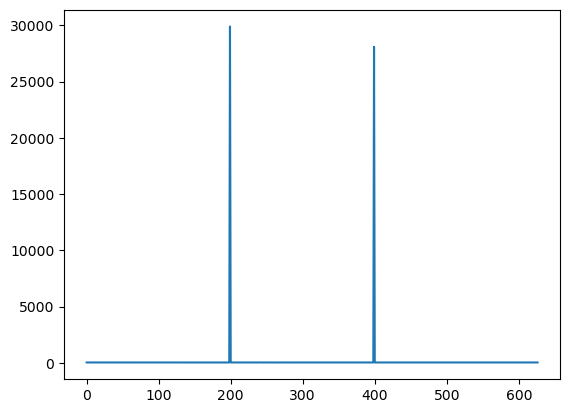

In [13]:

from allensdk.brain_observatory.brain_observatory_exceptions import EpochSeparationException   
import matplotlib.pyplot as plt
try:
    exp.get_stimulus_epoch_table()
except EpochSeparationException as e:
    delta = e.delta
    plt.plot(delta)
    plt.show()

In [39]:
print(master_stim_table)

              stimulus  start     end
0    drifting_gratings    891   19452
1  natural_movie_three  20413   39004
2    natural_movie_one  39934   49230
3    drifting_gratings  50160   68719
4          spontaneous  68869   78044
5  natural_movie_three  78045   96635
6    drifting_gratings  97565  118745


In [40]:
time_all = 0
for i,stim in enumerate(master_stim_table['stimulus']):
    if stim=='drifting_gratings':
        curr_time_points = master_stim_table['end'][i] - master_stim_table['start'][i]
        time_all += curr_time_points

print(time_all)


58300


## Allen data analysis

In [19]:
df = pd.read_csv('/home/mila/x/xuejing.pan/POYO/results/AllenBOmeta.csv')

df

In [20]:
df

,exp_id,subject_id,cre_line,depth,num_seqs,num_ROIs,num_timepoints
0,649409874,350249,Vip-IRES-Cre,175,628,26,58281
1,604328043,325932,Slc17a7-IRES2-Cre,375,628,52,56624
2,556353209,271750,Rbp4-Cre_KL100,375,628,21,56741
3,627823695,339814,Ntsr1-Cre_GN220,550,628,21,56618
4,662982346,357433,Vip-IRES-Cre,250,628,10,56751
...,...,...,...,...,...,...,...
428,564425777,283147,Emx1-IRES-Cre,175,628,274,56745
429,510390912,232623,Rorb-IRES2-Cre,275,628,87,56756
430,653123929,355467,Slc17a7-IRES2-Cre,275,628,287,56612
431,657775947,355670,Vip-IRES-Cre,175,628,8,56777


In [13]:
subjects = df['subject_id'].values

In [18]:

unique_values= np.unique(subjects, return_counts=False)

print(len(unique_values))

255


In [21]:
ROIs = df['num_ROIs'].values
sum_ROIs = np.sum(ROIs)
print(sum_ROIs)

40328


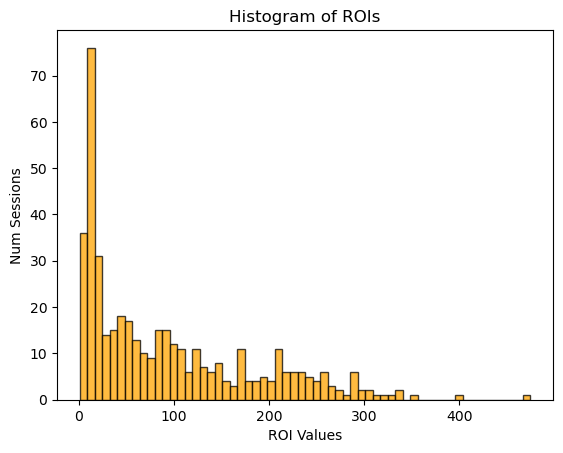

In [40]:
# Creating the histogram
plt.hist(ROIs, bins=60, alpha=0.75, color='orange', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of ROIs')
plt.xlabel('ROI Values')
plt.ylabel('Num Sessions')
plt.show()

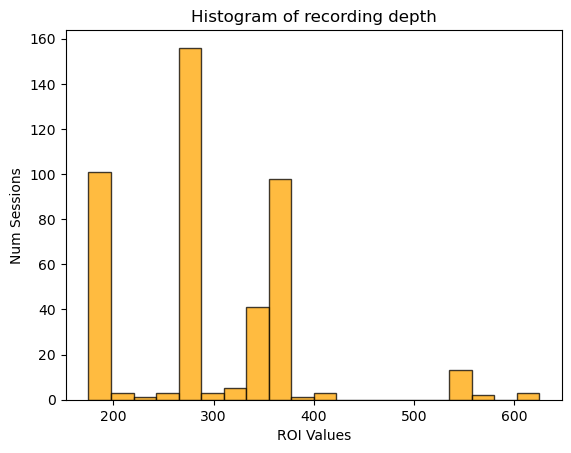

In [37]:
depths = df['depth'].values
# Creating the histogram
plt.hist(depths, bins=20, alpha=0.75, color='orange', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of recording depth')
plt.xlabel('ROI Values')
plt.ylabel('Num Sessions')
plt.show()

In [36]:
print(np.sum(df['num_timepoints'].values))

24633950


In [38]:
numbers = [
    175, 175, 175, 20, 20, 20, 20, 20, 20,
    175, 175, 175, 375, 375, 375, 75, 75, 75,
    50, 50, 50, 50, 50, 50, 375, 375, 375,
    20, 20, 20, 75, 75, 75, 20, 20, 20, 20, 20, 20, 20,
    375, 375, 375, 375, 175, 175, 175, 175, 175, 175
]

OS_depths = np.array(numbers)

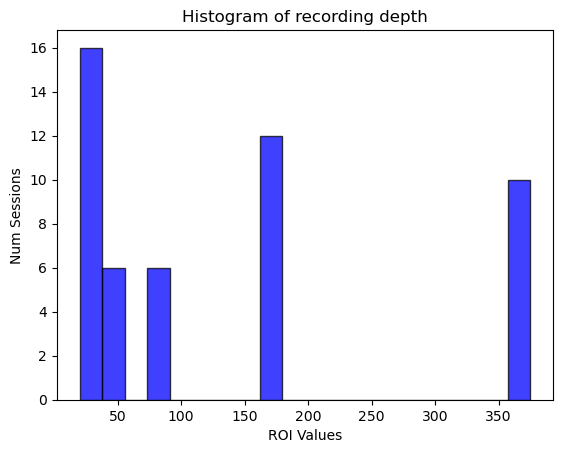

In [41]:
plt.hist(OS_depths, bins=20, alpha=0.75, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of recording depth')
plt.xlabel('ROI Values')
plt.ylabel('Num Sessions')
plt.show()

## prepping for dataloader

In [3]:
manifest_path = os.path.join("/home/mila/x/xuejing.pan/scratch", "manifest.json")
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [4]:
meta_df = pd.read_csv('/home/mila/x/xuejing.pan/POYO/project-kirby/data/scripts/allen_brain_observatory_calcium/AllenBOmeta.csv')
sess_ids = meta_df["exp_id"].values

In [5]:
curr_sess_id = sess_ids[1]

In [6]:
nwbfile = boc.get_ophys_experiment_data(curr_sess_id)

In [7]:
curr_meta_sess = nwbfile.get_metadata()

In [8]:
curr_meta_sess

{'sex': 'male',
 'targeted_structure': 'VISrl',
 'ophys_experiment_id': 604328043,
 'experiment_container_id': 604328040,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'session_start_time': datetime.datetime(2017, 7, 26, 8, 41, 51),
 'session_type': 'three_session_A',
 'specimen_name': 'Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-325932',
 'cre_line': 'Slc17a7-IRES2-Cre/wt',
 'imaging_depth_um': 375,
 'age_days': 105,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'pipeline_version': '3.0'}

In [9]:
curr_meta_sess['session_start_time'].strftime("%Y%m%d")

'20170726'

In [10]:
curr_meta=boc.get_ophys_experiments(ids=[curr_sess_id])

In [11]:
curr_meta

[{'id': 604328043,
  'imaging_depth': 375,
  'targeted_structure': 'VISrl',
  'cre_line': 'Slc17a7-IRES2-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 104,
  'experiment_container_id': 604328040,
  'session_type': 'three_session_A',
  'donor_name': '325932',
  'specimen_name': 'Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-325932',
  'fail_eye_tracking': False}]

In [12]:
subject_ids = meta_df["subject_id"].values

In [13]:
#traces: (num_ROIs, num_timepoints)
#timestamps: (num_timepoints,)
timestamps, traces = nwbfile.get_dff_traces()

In [14]:
ROI_ids = nwbfile.get_roi_ids()
print(ROI_ids)

[b'605077572' b'605077574' b'605077579' b'605077582' b'605077584'
 b'605077588' b'605077595' b'605077624' b'605077626' b'605077629'
 b'605077641' b'605077643' b'605077648' b'605077652' b'605077657'
 b'605077664' b'605077669' b'605077685' b'605077695' b'605077700'
 b'605077702' b'605077704' b'605077706' b'605077712' b'605077736'
 b'605077752' b'605077761' b'605077765' b'605077777' b'605077779'
 b'605077807' b'605077827' b'605077833' b'605077838' b'605077843'
 b'605077845' b'605077848' b'605077852' b'605077857' b'605077876'
 b'605077880' b'605077886' b'605077890' b'605077894' b'605077896'
 b'605077898' b'605077900' b'605077906' b'605077908' b'605077912'
 b'605077916' b'605077933']


In [15]:
num_ROIs = ROI_ids.shape[0]

In [16]:
np.arange(0,num_ROIs).astype(np.int16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int16)

In [17]:
#ROI pos, height and width
ROI_masks = nwbfile.get_roi_mask()

In [18]:
master_stim_table = nwbfile.get_stimulus_table('drifting_gratings')

In [19]:
master_stim_table

,temporal_frequency,orientation,blank_sweep,start,end
0,15.0,90.0,0.0,744,804
1,4.0,0.0,0.0,835,894
2,2.0,225.0,0.0,925,985
3,4.0,90.0,0.0,1015,1075
4,1.0,225.0,0.0,1106,1165
...,...,...,...,...,...
623,2.0,135.0,0.0,114809,114869
624,1.0,270.0,0.0,114899,114959
625,4.0,0.0,0.0,114990,115049
626,2.0,225.0,0.0,115080,115140


In [30]:
start_times = timestamps[master_stim_table['start']]
end_times = timestamps[master_stim_table['end']]
temp_freqs = master_stim_table['temporal_frequency']
orientation = master_stim_table["orientation"]

In [20]:
stim_df = pd.DataFrame(master_stim_table)

In [24]:
start_times = timestamps[stim_df.loc[(stim_df["blank_sweep"]==0.0), 'start']]
end_times = timestamps[stim_df.loc[(stim_df["blank_sweep"]==0.0), 'end']]
temp_freqs = stim_df.loc[(stim_df["blank_sweep"]==0.0), 'temporal_frequency']
orientations = stim_df.loc[(stim_df["blank_sweep"]==0.0), 'orientation']

In [35]:
np.max(orientations.values)

315.0

In [43]:
stimulus_epochs = nwbfile.get_stimulus_epoch_table()
session_start, session_end = (
    timestamps[stimulus_epochs.iloc[0]["start"]],
    timestamps[stimulus_epochs.iloc[-1]["end"]],
)

In [44]:
session_start

31.53391

## getting all ROI sizes

In [3]:


#Using a metadata file instead of dealing with filtering every single time
meta_df = pd.read_csv('/home/mila/x/xuejing.pan/POYO/project-kirby/data/scripts/allen_brain_observatory_calcium/AllenBOmeta.csv')
sess_ids = meta_df["exp_id"].values
subject_ids = meta_df["subject_id"].values
cre_lines = meta_df["cre_line"].values


In [4]:
roi_sizes = []
roi_heights = []
roi_widths = []


In [11]:
for count, curr_sess_id in enumerate(sess_ids):
    nwbfile = boc.get_ophys_experiment_data(curr_sess_id)
    ROI_masks = nwbfile.get_roi_mask()
    print(count)

    for i, mask_t in enumerate(ROI_masks):
        mask = ROI_masks[i].get_mask_plane()
        curr_area = np.count_nonzero(mask)

        rows, cols = np.where(mask)
        heights = np.max(rows) - np.min(rows) + 1
        widths = np.max(cols) - np.min(cols) + 1

        roi_sizes.append(curr_area)
        roi_heights.append(heights)
        roi_widths.append(widths)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:

roi_sizes = np.array(roi_sizes)
roi_heights = np.array(roi_heights)
roi_widths = np.array(roi_widths)

In [16]:
print(np.min(roi_sizes))
print(np.max(roi_sizes))
print(np.min(roi_heights))
print(np.max(roi_heights))
print(np.min(roi_widths))
print(np.max(roi_widths))

101
551
8
44
9
42


In [5]:
def min_max_scale(data, data_min, data_max):
    return 2 * ((data - data_min) / (data_max - data_min)) - 1


In [6]:
from sklearn.preprocessing import MinMaxScaler

for count, curr_sess_id in enumerate(sess_ids):
    nwbfile = boc.get_ophys_experiment_data(curr_sess_id)
    ROI_masks = nwbfile.get_roi_mask()

    _, traces= nwbfile.get_dff_traces()
    num_rois = traces.shape[0]

    areas = np.zeros(num_rois)
    heights = np.zeros(num_rois)
    widths = np.zeros(num_rois)

    for count, curr in enumerate(ROI_masks):
        mask = ROI_masks[count].get_mask_plane()
        areas[count] = np.count_nonzero(mask)

        rows, cols = np.where(mask)
        heights[count] = np.max(rows) - np.min(rows) + 1
        widths[count] = np.max(cols) - np.min(cols) + 1

    normalized_areas = min_max_scale(areas, 101.0, 551.0)
    normalized_heights = min_max_scale(heights, 8.0, 44.0)
    normalized_widths = min_max_scale(widths, 9.0, 42.0)

    break

In [15]:
feats = np.stack((normalized_heights,normalized_areas,normalized_widths))

In [17]:
np.swapaxes(feats,0,1).shape

(26, 3)

In [22]:
normalized_heights

array([-0.55555556, -0.38888889, -0.72222222, -0.55555556, -0.66666667,
       -0.77777778, -0.5       , -0.55555556, -0.38888889, -0.77777778,
       -0.61111111, -0.66666667, -0.66666667, -0.5       , -0.72222222,
       -0.55555556, -0.44444444, -0.61111111, -0.83333333, -0.77777778,
       -0.61111111, -0.72222222, -0.61111111, -0.72222222, -0.72222222,
       -0.5       ])

In [23]:
normalized_widths

array([-0.63636364, -0.75757576, -0.27272727, -0.81818182, -0.27272727,
       -0.81818182, -0.57575758, -0.33333333, -0.45454545, -0.6969697 ,
       -0.57575758, -0.63636364, -0.33333333, -0.93939394, -0.6969697 ,
       -0.75757576, -0.33333333, -0.51515152, -0.45454545, -0.45454545,
       -0.63636364, -0.51515152, -0.6969697 , -0.33333333, -0.39393939,
       -0.75757576])